## GAN (Generative Adversarial Networks) : 생성적 적대 신경망

#### 생성자(generator) : 가상의 이미지를 만들어 내는 공장

#### 판별자(Discriminator) : 진위를 가려내는 판별자
- 생성자에서 넘어온 이미지가 가짜인지 진짜인지를 판별해주는 장치

#### 생성자(Generator) 모델 구축 시 사용되는 특징
- 배치정규화 : BatchNormalization()
- Reshape
- Padding = Same
- UpSamplommg2D() : 이미지 사이즈를 맞추기 위해 업샘플링 진행
- LeakyReLU: ReLU 함수에서 x 의 값이 음수이면 무조건 0 이 되어 뉴런들이 일찍 소실되는 단점을 보완하기 위해
0 이하에서도 작은 값을 갖게 만드는 활성화 함수 (ex. LeakyReLU(0.2) : 0보다 작을 경우 0.2 를 곱하라는 의미)

### ※ MNIST 를 이용한 GAN 모델 만들기

In [33]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 생성자 모델을 만듭니다. 
generator = Sequential()
generator.add(Dense(128*7*7, input_dim = 100, activation = LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size =5, padding= 'same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
# activation = 'tanh' 을 쓰는 이유 : 출력되는 값을 -1~1 사이로 맞추기 위해서 사용
generator.add(Conv2D(1, kernel_size= 5, padding='same', activation = 'tanh'))

# 판별자 모델을 만듭니다.
discriminator = Sequential()
# strides 를 사용하는 이유는 Cov2D를 사용했을 때 커널 윈도우를 2칸씩 이동하기 위해 사용
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28, 28, 1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation= 'sigmoid'))

In [34]:
discriminator.compile(loss= 'binary_crossentropy', optimizer = 'adam')
# 모델 판별반 진행해야 하기 때문에 훈련을 진행하지 않는 설정 추가
discriminator.trainable= False

In [35]:
# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.

ginput = Input(shape=(100, ))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss= 'binary_crossentropy', optimizer = 'adam')
gan.summary()

Model: "functional_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (None, 28, 28, 1)      │       865,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_9 (Sequential)       │ (None, 1)              │       212,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,078,146 (4.11 MB)

 Trainable params: 852,609 (3.25 MB)

 Non-trainable params: 225,537 (881.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
epoch:0 d_loss: 0.7549 g_loss:0.7310
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
epoch:1 d_loss: 0.7360 g_loss:0.7289
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
epoch:2 d_loss: 0.7293 g_loss:0.7256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
epoch:3 d_loss: 0.7288 g_loss:0.7262
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
epoch:4 d_loss: 0.7282 g_loss:0.7265
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
epoch:5 d_loss: 0.7292 g_loss:0.7279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
epoch:6 d_loss: 0.7288 g_loss:0.7276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
epoch:7 d_loss: 0.7302 g_loss:0.7291
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
epoch:8 d_loss: 0.7303 g_loss:0.7295
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
epoch:9 d_loss: 0.7298 g_loss:0.7290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
epoch:10 d_loss: 0.7293 g_loss:0.7288
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
epoch:11 d_loss: 0.7294 g_loss:0.7290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
epoch:12 d_loss: 0.729

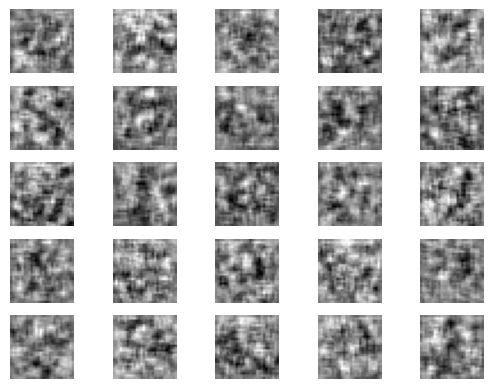

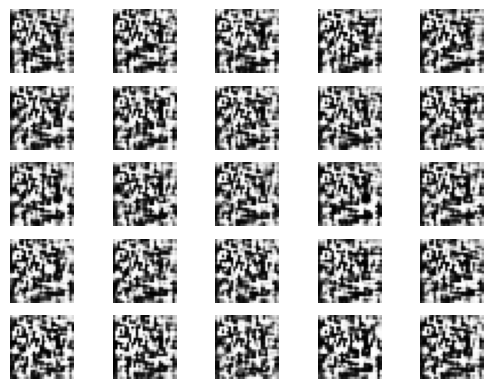

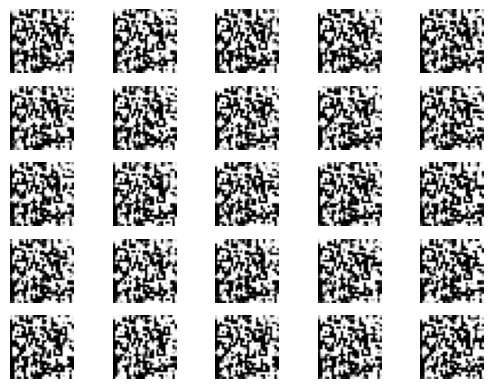

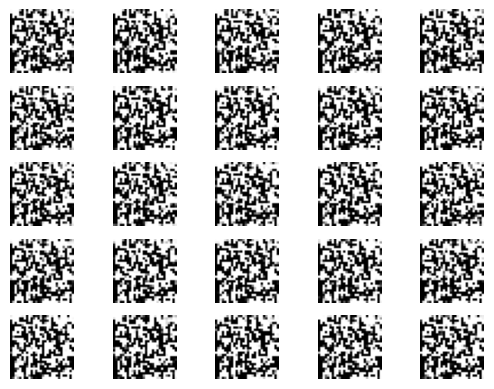

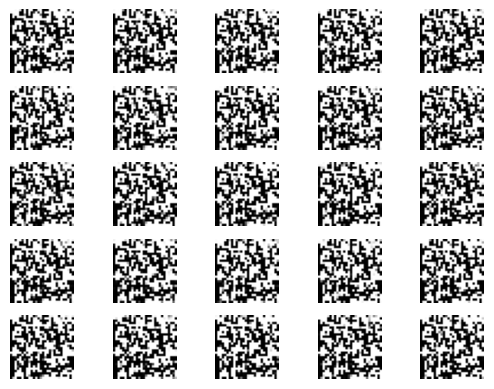

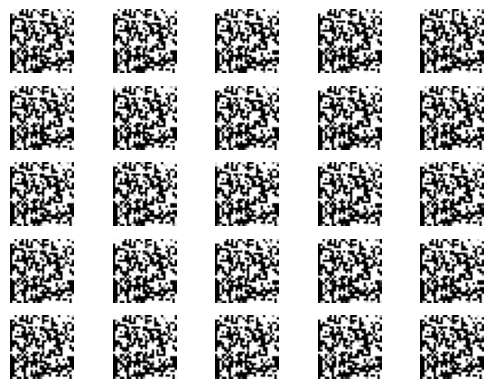

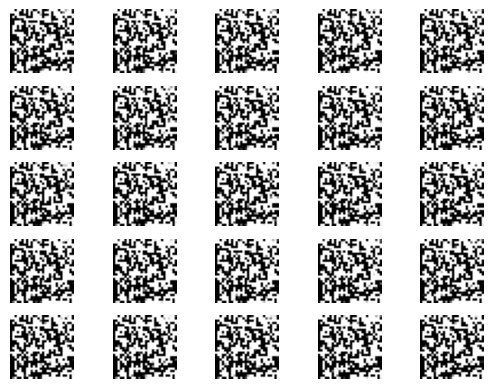

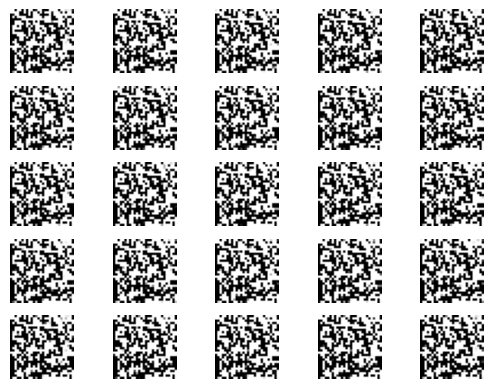

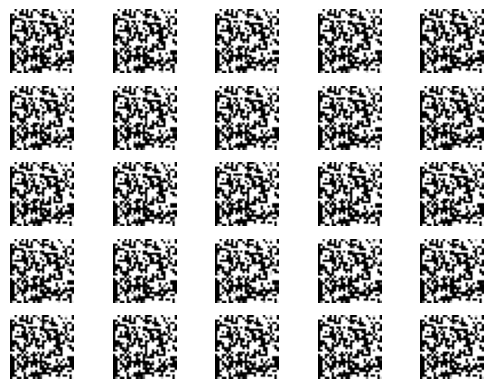

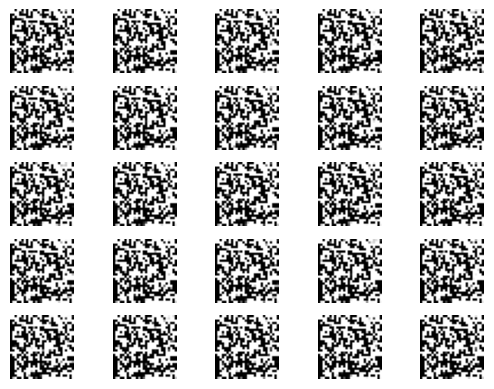

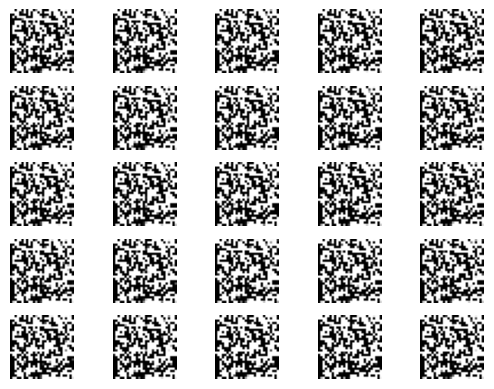

In [37]:
# 신경망을 실행시키는 함수 생성
def gan_train(epoch, batch_size, saving_interval):

    # MNIST 데이터 불러오기 (이미지만 사용하기 때문에 train 데이터만 불러오기)
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

    # 127.5를 뺀 후 127.5 로 나누어주기 (-1 ~ 1 사이의 값으로 변경하기 위하여)
    X_train = (X_train - 127.5) / 127.5

    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for i in range(epoch):
        # 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        # train_on_batch는 고정된 batch size를 신경쓰지 않고, 입력으로 준 콜렉션에 대한 weights를 명시적으로 업데이트하도록 해준다.
        d_loss_real = discriminator.train_on_batch(imgs, true)

        # 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        # 판별자와 생성자 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        g_loss = gan.train_on_batch(noise, true)

        print('epoch:%d' % i, 'd_loss: %.4f' % d_loss, 'g_loss:%.4f' % g_loss[0])

        # 중간 과정을 이미지로 저장하는 부분
        # 정해진 인터벌만큼 학습되면 그때 만든 이미지를 gan_image 폴더에 저장하라는 의미.
        if i % saving_interval == 0:
            # r, c = 5, 5
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)

            # Rescale image 0 -1
            gen_imgs = 0.5 * gen_imgs + 0.5

            fig, axs = plt.subplots(5, 5)
            count = 0 
            for j in range(5):
                for k in range(5):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap ='gray')
                    axs[j, k].axis('off')
                    count += 1

            fig.savefig(f"gan_images/gan_mnist_{i}.png")

# 2000 번 반복되고 배치 크기는 32, 200 번 마다 결과가 저장됩니다
gan_train(2001, 32, 200)

## Auto-Encoder 실습

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.2661 - val_loss: 0.0888
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0876 - val_loss: 0.0815
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0814 - val_loss: 0.0780
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0785 - val_loss: 0.0759
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0765 - val_loss: 0.0745
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0750 - val_loss: 0.0734
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0738 - val_loss: 0.0726
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0731 - val_loss: 0.0719
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0724 - val_loss: 0.0713
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0718 - val_loss: 0.0709
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0714 - val_loss: 0.0706
Epoch 12/50
469/469 ━━━━━━━━━━

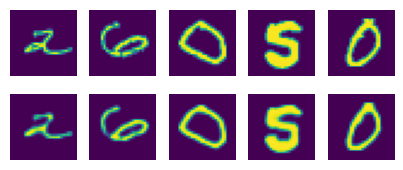

In [53]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MNIST 데이터 불러오기
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델 생성
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Input(shape=(28, 28, 1)))
autoencoder.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) # 14x14
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) # 7x7
autoencoder.add(Conv2D(8, kernel_size=3, strides=1, padding='same', activation='relu')) # 7x7

# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) # 7x7
autoencoder.add(UpSampling2D()) # 14x14
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) # 14x14
autoencoder.add(UpSampling2D()) # 28x28
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', activation='relu')) # 28x28
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')) # 28x28

# 컴파일 및 학습을 하는 부분
autoencoder.compile(loss='binary_crossentropy', optimizer= 'adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size = 5)

# 테스트할 이미지를 랜덤으로 호츌
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 넣기

plt.figure(figsize = (7, 2))

for i, image_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i+1)
    # 테스트할 이미지를 먼저 그대로 보여주기
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    # 오토인코딩 결과를 다음 열에 입력
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
plt.show()

